<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/TrueVolume_%E7%BE%8E%E8%82%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

統計起始日:2023/03/27
^TWII


[*********************100%%**********************]  1 of 1 completed


2024-04-30  20396.6
last vol: 0.0
MACD 月: >0 週: >0 日: -
balanced macd: 0.6


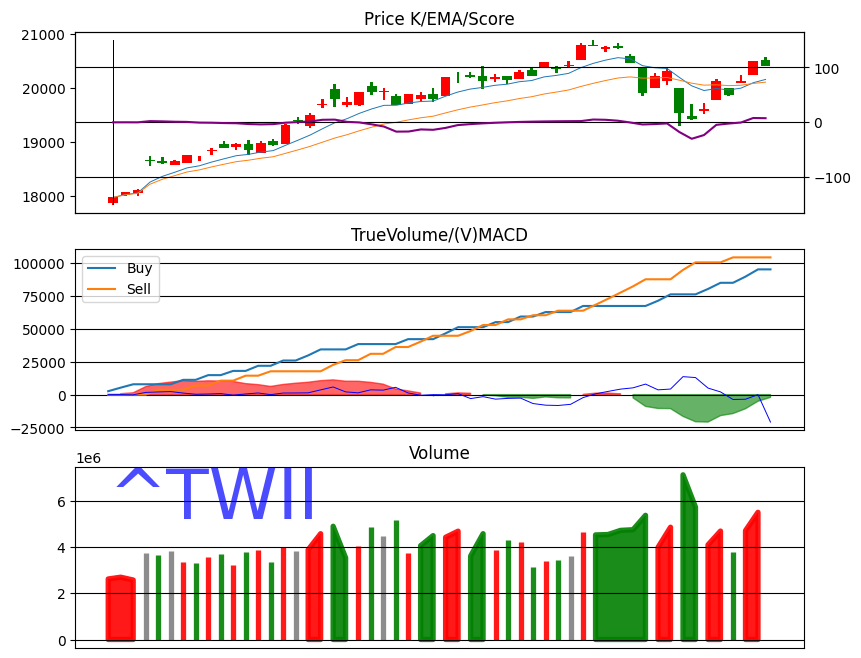

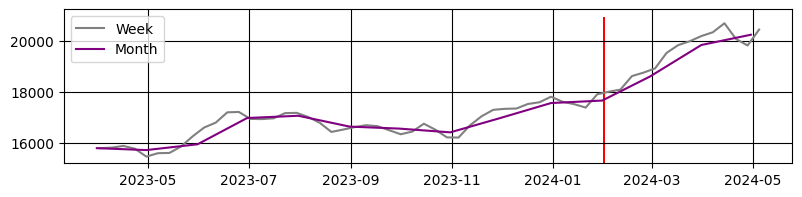

In [ ]:
#!pip install mplfinance
import pandas as pdd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
#import mplfinance as mpf
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (7.4, 4)

stoid='^TWII'

thisday = datetime.today()
day_start = thisday - timedelta(days=400)
draw_start = thisday - timedelta(days=90)
#day_start = thisday.replace(month=1, day=1)

def TrueVol(pd):
  df=pd
  global thisday
  global draw_start
  end_date = thisday
  start_date = draw_start
  df = df[df['Date'].between(start_date, end_date)]
  df = df.reset_index(drop=False)
  opp=df['Open']
  clo=df['Adj Close']
  voo=df['Volume']
  hig=df['High']
  llo=df['Low']
  upl=[]
  dol=[]
  bll=[]
  upc=0.0
  dlc=0.0
  blc=0.0
  lp=0.0
  lgv=1.0
  lgc=0
  upordown=0.0
  xvo=[]
  for i in range(len(opp)):
    if(lp==0.0):
      lp=opp[i]
    if clo[i] > lgc:
      lgc = clo[i]
    upordown=0
    if clo[i]>=opp[i]:
      if (opp[i]>=lp and clo[i] >= opp[i] + ((hig[i] - opp[i])/2.08)) or (clo[i]>lp and clo[i] >= lp + ((hig[i] - lp)/1.8)):
        upc+=(voo[i]/1000)
        upordown=1
      else:
        if clo[i]<lp or (clo[i]<llo[i]+((hig[i]-llo[i])/3.8)) or (clo[i] < opp[i] + (hig[i] - opp[i])/4.8):
          dlc+=(voo[i]/1000)
          upordown=-1
    else:
      if clo[i]<lp or (clo[i] <= opp[i]-((opp[i]-llo[i])/3.8)) or (opp[i]>lp and clo[i]<lp+((opp[i]-lp)/4.8)):
        dlc+=(voo[i]/1000)
        upordown=-1
      else:
        if clo[i] >= llo[i]+((hig[i]-llo[i])/1.8):
          upc+=(voo[i]/1000)
          upordown=1
    upl.append(upc)
    dol.append(dlc)
    blc+=voo[i]/1000
    bll.append(blc/2)
    xvo.append(upordown)
    lp=clo[i]
    if(voo[i]/1000 > lgv):
      lgv=voo[i]/1000

  print('last vol:',voo.iloc[-1]/10000)

  ema10=clo.ewm(span=9).mean()
  ema30=clo.ewm(span=26).mean()

  Vol12     = voo.ewm(span=12).mean()
  Vol26     = voo.ewm(span=26).mean()
  Vacd      = Vol12 - Vol26
  Vsig = Vacd.ewm(span=9).mean()
  Vhistogram =Vacd-Vsig

  exp12     = clo.ewm(span=12, adjust=False).mean()
  exp26     = clo.ewm(span=26, adjust=False).mean()
  macd      = exp12 - exp26
  signal    = macd.ewm(span=9, adjust=False).mean()
  histogram = macd - signal

  gg3 = abs(max(histogram))/abs(max(Vhistogram))
  Vhistogram = Vhistogram*gg3

  v100=np.array(voo)
  vfix=100/max(v100)
  v100=v100*vfix

  gg1=max(upl[-1], dol[-1])
  bbb=0.0
  sco=[]
  x=[]
  vlv=9999/lgv
  vlc=999/lgc
  clm=2/max(abs(histogram))
  vlm=2/max(abs(Vhistogram))
  for i in range(len(upl)):
    bbb=((ema10.iloc[i]-ema30.iloc[i])*vlc*666)+((upl[i]-dol[i])*vlv/3)
    histo = abs(bbb)*clm*histogram[i]
    if i>0 and Vhistogram[i]>0:
      ddd=histogram[i]-histogram[i-1]
      #bbb += ddd*voo[i]
      bbb += ddd*v100[i]*abs(bbb/8)
    sco.append(bbb)
    x.append(str(i))
  sco=np.array(sco)
  gg3 = 50/max(abs(sco))
  sco = sco*gg3

  sco2 = pdd.DataFrame(sco)
  Sco12     = sco2.ewm(span=12).mean()
  Sco26     = sco2.ewm(span=26).mean()
  Sacd      = Sco12 - Sco26
  #Ssig = Sacd.ewm(span=9).mean()
  #Shistogram =Sacd-Ssig

  Sacd = np.array(Sacd)
  gg3=30/max(abs(Sacd))
  Sacd = Sacd*gg3

  gg3=gg1/max(abs(Vhistogram))
  Vhistogram2 = Vhistogram*gg3/5

  gg3=gg1/max(abs(histogram))
  histogram2 = histogram*gg3/5


  df1 = pd.set_index('Date')
  # 計算月線EMA
  mEma12 = df1['Close'].resample('M').mean().ewm(span=12).mean()
  mEma26 = df1['Close'].resample('M').mean().ewm(span=26).mean()
  mMacd = mEma12 - mEma26
  mSignal = mMacd.ewm(span=9).mean()
  mHisto = mMacd-mSignal
  # 計算週線EMA
  wEma12 = df1['Close'].resample('W').mean().ewm(span=12).mean()
  wEma26 = df1['Close'].resample('W').mean().ewm(span=26).mean()
  wMacd = wEma12 - wEma26
  wSignal = wMacd.ewm(span=9).mean()
  wHisto = wMacd-wSignal

  MUP='-'
  if mHisto.iloc[-1]>0:
    MUP = '>0'
  WUP='-'
  if wHisto.iloc[-1]>0:
    WUP = '>0'
  DUP='-'
  if histogram.iloc[-1]>0:
    DUP = '>0'

  print('MACD 月:',MUP,'週:',WUP, '日:', DUP)

  macd_bal = histogram.iloc[-1]*(1/max(abs(histogram)))*0.2
  macd_bal += wHisto.iloc[-1]*(1/max(abs(wHisto)))*0.3
  macd_bal += mHisto.iloc[-1]*(1/max(abs(mHisto)))*0.5

  print("balanced macd:", round(macd_bal,2))

  if macd_bal < 0:
    Sacd = Sacd + (abs(Sacd)*macd_bal*6)

  mpl.rcParams["figure.figsize"] = (9.4, 8)
  #mpl.rcParams["figure.dpi"] = 200

  ax1 = plt.subplot(311)
  ax2 = ax1.twinx()
  ax1.plot(ema10,linewidth=0.7)
  ax1.plot(ema30,linewidth=0.7)

  #ax2.fill_between(clo.index, sco, where=(sco<0), color='purple', alpha=0.3)
  #ax2.fill_between(clo.index, sco, where=(sco>0), color='purple', alpha=0.5)
  mm = max(abs(sco))*3
  xx = [0, 0]
  h = [0-mm, mm]
  ax2.bar(xx, h, 0.1, color='black', linewidth=0)
  ax2.plot(Sacd, color = 'purple')

  #define width of candlestick elements
  width = 0.8
  width2 = 0.2

  #define up and down prices
  up = df[df["Close"]>=df["Open"]]
  down = df[df["Close"]<df["Open"]]

  #define colors to use
  col2 = 'green'
  col1 = 'red'

  up_open=up["Open"]
  up_high=up["High"]
  up_low=up["Low"]
  up_close=up["Close"]
  #plot up prices
  ax1.bar(up.index,up_close-up_open,width,bottom=up_open,color=col1)
  ax1.bar(up.index,up_high-up_close,width2,bottom=up_close,color=col1)
  ax1.bar(up.index,up_low-up_open,width2,bottom=up_open,color=col1)

  dn_open=down["Open"]
  dn_high=down["High"]
  dn_low=down["Low"]
  dn_close=down["Close"]
  #plot down prices
  ax1.bar(down.index,dn_close-dn_open,width,bottom=dn_open,color=col2)
  ax1.bar(down.index,dn_high-dn_open,width2,bottom=dn_open,color=col2)
  ax1.bar(down.index,dn_low-dn_close,width2,bottom=dn_close,color=col2)

  #ax1.set_ylabel('EMA', color='tab:blue')
  #ax2.set_ylabel('Score', color='tab:blue')
  #ax1.plot(clo, linewidth=0.5)
  plt.gca().xaxis.set_ticks([])
  plt.title('Price K/EMA/Score')
  plt.grid(color='black')

  plt.subplot(312)
  plt.plot(upl,label='Buy')
  plt.plot(dol,label='Sell')
  plt.plot(Vhistogram2, color='blue', linewidth=0.7)
  #plt.fill_between(x, Vhistogram2, where=(Vhistogram2>0), color='blue', alpha=0.6)
  #plt.fill_between(x, Vhistogram2, where=(Vhistogram2<0), color='blue', alpha=0.6)
  plt.fill_between(x, histogram2, where=(histogram2>0), color='red', alpha=0.6)
  plt.fill_between(x, histogram2, where=(histogram2<0), color='green', alpha=0.6)
  plt.legend()
  plt.gca().xaxis.set_ticks([])
  plt.title('TrueVolume/(V)MACD')
  plt.grid(color='black')

  xvo = np.array(xvo)
  plt.subplot(313)
  plt.title('Volume')
  plt.fill_between(x, voo, where=(xvo==0), color='gray', alpha=0.9,linewidth=3.8)
  plt.fill_between(x, voo, where=(xvo<0), color='green', alpha=0.9,linewidth=3.8)
  plt.fill_between(x, voo, where=(xvo>0), color='red', alpha=0.9,linewidth=3.8)
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')
  ytop=int(max(plt.ylim()))*0.7
  plt.annotate(stoid,xy=(0,ytop),color='blue',alpha=0.7,fontsize=50)

  mpl.rcParams["figure.figsize"] = (9.4, 2)
  plt.figure()
  plt.plot(df1['Close'].resample('W').mean(), color='gray', label='Week')
  plt.plot(df1['Close'].resample('M').mean(), color='purple', label='Month')
  plt.bar(draw_start,max(plt.ylim())-min(plt.ylim()),1,bottom=min(plt.ylim()),color='red')
  plt.legend()
  plt.grid(color='black')

  plt.show()

print("統計起始日:"+day_start.strftime("%Y/%m/%d"))

print(stoid)

# 讀取股價資料
data1 = yf.download(stoid,start=day_start, end=thisday)
data1 = data1.reset_index(drop=False)

def keep_first_line(text):
    lines = text.splitlines()
    if lines:
        return lines[0]
    else:
        return ""

df=data1.tail(1)
tt1 =str(df["Date"])
tt1 = keep_first_line(tt1)
tt1 = tt1[-10:]
tt2 = str(round(df["Close"],2))
tt2 = keep_first_line(tt2)
tt2= tt2[6:]
print(tt1,tt2)

TrueVol(data1)